In [402]:
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import pairwise_distances_argmin_min
import nltk
nltk.download('punkt')
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/austinkrause/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [421]:
pd.options.display.max_columns = 1000

<h3>Load in csv

In [25]:
df = pd.read_csv('df_with_gensim_summaries.csv')

In [28]:
#drop unnecessary columns
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1.1'], axis = 1)

<h3>Preview of dataframe

In [33]:
df.head()

,title,content,category,gensim_summary,first_100,sent_tokenized
0,Agent Cooper in Twin Peaks is the audience: on...,And never more so than in Showtime’s new...,Longform,"In the second season finale, back in 1991, the...",And never more so than in Showtime’s new serie...,[' And never more so than in Showtime’s n...
1,"AI, the humanity!",AlphaGo’s victory isn’t a defeat for hum...,Longform,When speaking to DeepMind and Google developer...,AlphaGo’s victory isn’t a defeat for humans — ...,[' AlphaGo’s victory isn’t a defeat for h...
2,Massive attack,How a weapon against war became a weapon...,Longform,International visitors for the event are commo...,How a weapon against war became a weapon again...,[' How a weapon against war became a weap...
3,Brain drain,Genius quietly laid off a bunch of its e...,Longform,"In a post on the Genius blog at the time, co-f...",Genius quietly laid off a bunch of its enginee...,[' Genius quietly laid off a bunch of its...
4,Facebook takes flight,Inside the test flight of Facebook’s fir...,Longform,But if your goal is to stay in the air for a l...,Inside the test flight of Facebook’s first int...,[' Inside the test flight of Facebook’s f...


<h3>Clustering --- MESSY!

In [34]:
titles = df.title.tolist()
summaries = df.gensim_summary.tolist()

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [59]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(summaries)

In [69]:
pred_clusters = model.predict(X)

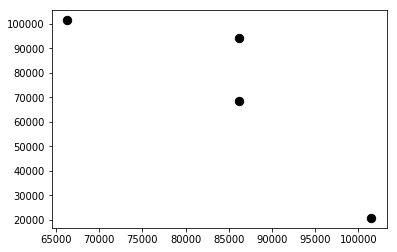

In [133]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
#plt.scatter(X[:, 0], X[:, 1], c=pred_clusters, s=10)
terms = vectorizer.get_feature_names()
plt.scatter(order_centroids[:, 0], order_centroids[:, 1], c='black', s=70)

In [119]:
import ast

In [156]:
len(ast.literal_eval(test))

85

In [274]:
def cluster_article_sents(sentences):
    #tune function for edge cases
    if type(sentences) == str:
        #if text is a list within a string:
        if sentences[0] == '[':
            #perform literal eval of string (take off the quotes and keep the list)
            document = ast.literal_eval(sentences)
            print('literal eval')
        else:
            #if raw text, tokenize the sentences
            document = sent_tokenize(sentences, language = 'en')
            print('raw text')
    else:
        document = sentences
        print('already tokenize')
    print(document[:10])
    print(len(document))
    
    #vectorize sentences of the document
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(document)
    
    #cluster sentences within document
    k = int(np.floor(len(document)**.5))
    print(k)
    model = KMeans(n_clusters = k, random_state = 0) #, init = 'k-means++', max_iter = 100, n_init = 1)
    
    #fit model to document
    model.fit(X)
   
    #create empty lists to hold ################
    avg = []
    closest = []
    
    for i in range(k):
        idx = np.where(model.labels_ == i)[0]
        print(idx)
        avg.append(np.mean(idx))
    print(avg)
    print(model.cluster_centers_)
    #closest, _ = pairwise_distances_argmin_min(model.cluster_centers_, !!!!)

    
    
    #plotting
    centers = model.cluster_centers_ #.argsort()[:, ::-1]
    #plt.scatter(X[:, 0], X[:, 1], c = X, s=10)
    terms = vectorizer.get_feature_names()
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70)

In [267]:
test = df.sent_tokenized[2]
len(ast.literal_eval(test))

77

In [252]:
sample = ['this is one sentence.', 'this is a second sentence.', 'this is a third.']

literal eval
['      How a weapon against war became a weapon against the web Every year, artists and technology enthusiasts meet in Linz, Austria, for the Ars Electronica Festival, a meetup in the city’s downtown, located just off the Danube River.', 'The festival is a haven for those with an eye toward the future — something between Burning Man and a TED conference, with visitors navigating scientific equipment, LED lights, and colorful installations.', 'International visitors for the event are common enough, but the 1998 festival featured an unlikely participant: the Pentagon.That year, members of an art group called the Electronic Disturbance Theater were invited to demonstrate a program called FloodNet.', 'Billed as a “virtual sit-in,” users navigated to the FloodNet website at a predetermined time, and through a simple Java tool, were directed to a targeted website that would reload constantly, every few seconds.', 'With enough people — perhaps thousands — the sit-in caused targe

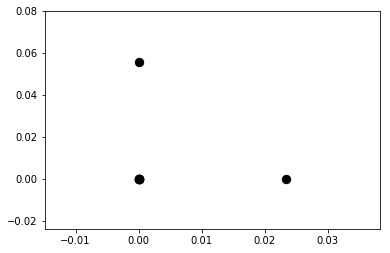

In [275]:
cluster_article_sents(test)

In [125]:
np.sqrt(85)

9.219544457292887

<h3>Finding Cosine Similarity Between All Sentences

In [495]:
sample = """Drivers don’t always realize that they may be overpaying for car insurance. If you haven't compared quotes
recently, even if you have a low rate, you could still be paying too much. Fortunately, millions of smart drivers have
used EverQuote™'s free service to save hundreds on their insurance bills. It’s really no wonder that with so many 
drivers saving money, EverQuote™ is gaining momentum. EverQuote™ is an efficient source that tries to give consumers
the lowest rates with tools you can trust. Just imagine what you could do with the money you save!"""

In [561]:
sample_2 = """President Donald Trump and his Polish counterpart Andrzej Duda were to announce higher US troop levels in Poland 
on Wednesday, with the main question being whether Washington will defy Russian objections to establish an American 
base in the NATO country. A senior Trump administration official said the White House meeting would see the two 
leaders make a significant announcement." Whether Trump will risk irritating Moscow with a base or take the simpler 
option of adding more troops to the current non-permanent force was unclear. Located deep in what used to be 
Soviet-dominated eastern Europe, Poland is a member of NATO but has long wanted deeper US commitment. Spooked by 
resurgent Russia's seizing control of territory in Georgia and Ukraine over the last decade, Duda has tried to charm 
the US president, even touting the idea of Poland building a "Fort Trump" to house thousands of US soldiers.
Krzysztof Szczerski, an adviser to the Polish president, said the general concept of a "Fort Trump" was on the 
agenda Wednesday and that the US presence "will increase both in quality as well as quantity." """

In [487]:
test_df

,always,bills,car,compared,consumers,could,drivers,efficient,even,everquote,fortunately,free,gaining,give,hundreds,imagine,insurance,low,lowest,many,may,millions,momentum,money,much,overpaying,paying,quotes,rate,rates,realize,really,recently,save,saving,service,smart,source,still,tools,tries,trust,used,wonder
Drivers don’t always realize that they may be overpaying for car insurance.,0.403183,0.000000,0.403183,0.000000,0.000000,0.000000,0.279128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.330615,0.000000,0.000000,0.000,0.403183,0.000000,0.000,0.000000,0.000000,0.403183,0.000000,0.000000,0.000000,0.000000,0.403183,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
"If you haven't compared quotes\nrecently, even if you have a low rate, you could still be paying too much.",0.000000,0.000000,0.000000,0.321538,0.000000,0.263666,0.000000,0.000000,0.321538,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.321538,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.321538,0.000000,0.321538,0.321538,0.321538,0.000000,0.000000,0.000,0.321538,0.000000,0.000,0.000000,0.000000,0.000000,0.321538,0.000000,0.000000,0.000000,0.000000,0.000
"Fortunately, millions of smart drivers have\nused EverQuote™'s free service to save hundreds on their insurance bills.",0.000000,0.311536,0.000000,0.000000,0.000000,0.000000,0.215681,0.000000,0.000000,0.215681,0.311536,0.311536,0.000,0.000000,0.311536,0.000000,0.255464,0.000000,0.000000,0.000,0.000000,0.311536,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.255464,0.000,0.311536,0.311536,0.000000,0.000000,0.000000,0.000000,0.000000,0.311536,0.000
"It’s really no wonder that with so many \ndrivers saving money, EverQuote™ is gaining momentum.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250617,0.000000,0.000000,0.250617,0.000000,0.000000,0.362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362,0.000000,0.000000,0.362,0.296845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362,0.000000,0.000000,0.362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.362
EverQuote™ is an efficient source that tries to give consumers\nthe lowest rates with tools you can trust.,0.000000,0.000000,0.000000,0.000000,0.324797,0.000000,0.000000,0.324797,0.000000,0.224861,0.000000,0.000000,0.000,0.324797,0.000000,0.000000,0.000000,0.000000,0.324797,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324797,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.324797,0.000000,0.324797,0.324797,0.324797,0.000000,0.000
Just imagine what you could do with the money you save!,0.000000,0.000000,0.000000,0.000000,0.000000,0.472079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.575696,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.472079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.472079,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000


In [553]:
def find_similarities(text):
    #tokenize sentences
    sentences = sent_tokenize(text, language = 'en')
    #set stop words
    stops = list(set(stopwords.words('english'))) + list(punctuation)
    
    #vectorize sentences
    vectorizer = TfidfVectorizer(stop_words = stops)
    trsfm=vectorizer.fit_transform(sentences)
    #creat df for article
    text_df = pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=sentences)
    
    #declare how many sentences to use in summary
    num_sentences = text_df.shape[0]
    num_summary_sentences = int(np.ceil(num_sentences**.5))
    
    #find cosine similarity for all sentences
    similarities = cosine_similarity(trsfm, trsfm)
    
    #create list to hold avg cosine similarities for each sentence
    avgs = []
    for i in similarities:
        avgs.append(i.mean())
     
    #find index values of the sentences to be used for summary
    top_idx = np.argsort(avgs)[-num_summary_sentences:]
    
    return top_idx

In [554]:
find_similarities(sample)

array([3, 5, 2])

In [567]:
def return_summary(text):
    sents_for_sum = find_similarities(text)
    return sents_for_sum
#     sents_for_sum = sents_for_sum.tolist().sort()
#     print(sents_for_sum)
#     sent_list = sent_tokenize(text)
#     print(len(sent_list))
#     sents = []
#     for i in sents_for_sum:
#         sents.append(sent_list[i].replace('\n', ''))
    
#     summary = ' '.join(sents)
#     return summary

In [568]:
return_summary(sample_2)

array([5, 4, 0])

In [19]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')


In [20]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")


In [21]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [23]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [35]:
def stem_tokenize_all(lst):
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in lst:
        allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
        totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)
    return totalvocab_stemmed, totalvocab_tokenized

In [37]:
total_vocab_stemmed, total_vocab_tokenized = stem_tokenize_all(summaries)

In [51]:
len(total_vocab_tokenized)

7984855

In [52]:
len(total_vocab_stemmed)

7984855

In [39]:
#create new df with stemmed vocab as the index and tokenized words as column
vocab_df = pd.DataFrame({'words': total_vocab_tokenized}, index = total_vocab_stemmed)
print(str(vocab_df.shape[0]) + ' items in vocab_frame')

7984855 items in vocab_frame


In [42]:
vocab_df.head()

,words
in,in
the,the
second,second
season,season
final,finale


<h3>TF-IDF

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time 
#fit the vectorizer to summaries
tfidf_matrix = tfidf_vectorizer.fit_transform(summaries) 

tfidf_matrix.shape

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


/Users/austinkrause/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(97064, 2)

In [57]:
#get list of features from the tf-idf matrix
features = tfidf_vectorizer.get_feature_names()

In [58]:
features

['s', 'said']

In [53]:
#find cosine similarity 

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


KeyboardInterrupt: 

In [ ]:
dist